In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Empirical Distribution of a statistic

In [2]:
united = Table.read_table('data/united.csv')

# Swain vs. Alabama ##

In [3]:
num_people = 3_300_00 # pop of talladega county
black_proportion = 0.26
nonblack_proportion = 0.74
num_panel = 100

In [4]:
black = np.repeat('black', int(0.26*num_people))
nonblack = np.repeat('nonblack', int(0.74*num_people))
county_total = np.append(black, nonblack)
county_total_table = Table().with_column('people', county_total)

In [6]:
county_total_table.group('people')

people,count
black,85800
nonblack,244200


In [8]:
(num_people * black_proportion, num_people * nonblack_proportion)

(85800.0, 244200.0)

In [28]:
panel = county_total_table.sample(num_panel).group('people')
panel

people,count
black,34
nonblack,66


In [29]:
panel.column('count')/100

array([ 0.34,  0.66])

In [30]:
population_proportions = make_array(black_proportion, nonblack_proportion)
population_proportions # proportion of black vs nonblack folks in Talladega county in 60s
#26% black, 74% nonblack

array([ 0.26,  0.74])

In [32]:
sample_proportions(num_panel, population_proportions)
# same as
# panel = county_total_table.sample(num_panel).group('people')
# panel.column('count')/100

array([ 0.29,  0.71])

In [33]:
def panel_proportion():
    return sample_proportions(num_panel, population_proportions).item(0)

In [43]:
my_panel = make_array()
my_panel = np.append(my_panel, panel_proportion()) # simulating one jury panel
my_panel

array([ 0.29])

In [44]:
# simulating three jury panels
#print(panel_proportion() )
#print(panel_proportion() ) 
#print(panel_proportion() )
my_panel = make_array()
my_panel = np.append(my_panel, panel_proportion()) # simulating one jury panel
my_panel = np.append(my_panel, panel_proportion()) # simulating one jury panel
my_panel = np.append(my_panel, panel_proportion()) # simulating one jury panel
my_panel

array([ 0.29,  0.3 ,  0.2 ])

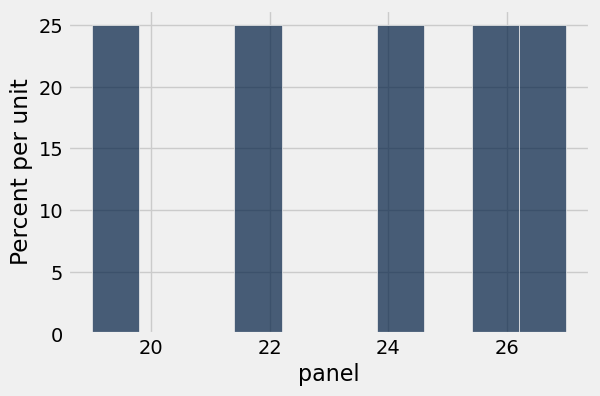

In [50]:
# simulating five jury panels
#print(panel_proportion() ) 

#print(panel_proportion() ) 
#print(panel_proportion() ) 
#print(panel_proportion() ) 
#print(panel_proportion() ) 
my_panel = make_array()
my_panel = np.append(my_panel, panel_proportion()*100) # simulating one jury panel
my_panel = np.append(my_panel, panel_proportion()*100) # simulating one jury panel
my_panel = np.append(my_panel, panel_proportion()*100) # simulating one jury panel
my_panel = np.append(my_panel, panel_proportion()*100) # simulating one jury panel
my_panel = np.append(my_panel, panel_proportion()*100) # simulating one jury panel

Table().with_column('panel',my_panel).hist()

In [51]:
# simulating 10_000
# here is where manually copying and pasting the above line of code becomes less reasonable...
# too much time, hurts my fingers

panels = make_array()  # initialize an empty array, outside of the for loop
# so that i can capture each simulation's jury panel, black proportion
for i in np.arange(10_000): # this line acts as a counter for how many tips my for loop will run
    # i "traverses" through my np.arange(10_000)
    # i changes value each time my for loop runs
    # np.arange(10_000) = (0, 1, 2 ... 9_999), first time my for loop runs, i = 0, last time my for loop runs i = 9_999
    # prevents us from getting into an infinite loop
    panels = np.append(panels, panel_proportion()*100) # simulating one jury panel

    

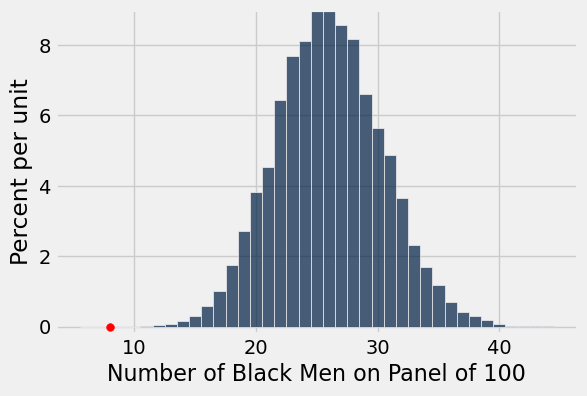

In [54]:
panels_table = Table().with_column('Number of Black Men on Panel of 100', panels)
panels_table.hist(bins = np.arange(5.5, 45.))

# Plotting details; ignore this code (out of the scope of CMPSC 5A
# plotting observed statistic: 8 black men in jury panel
plots.ylim(-0.002, 0.09)
plots.scatter(8,0,color='red', s=30); # observed statistic: 8 black men on Robert Swain's jury panel

In [58]:
panels_table.group('Number of Black Men on Panel of 100').show()

Number of Black Men on Panel of 100,count
11,1
12,3
13,8
14,16
15,31
16,58
17,100
18,175
19,270
20,382


# Mendel and Pea Flowers 

Mendel had 929 plants, of which 709 had purple flowers